In [1]:
from hepmc import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib notebook

In [9]:
camel = densities.Camel(1)

In [10]:
proposal_weights = np.array([.5, .5])
channels = MultiChannel([
    densities.Gaussian(1, mu=1/3, cov=.005),
    densities.Gaussian(1, mu=2/3, cov=.005)],
    proposal_weights)

importance_sample = channels.rvs(10000)

In [20]:
importance_df = pd.DataFrame(importance_sample)

/net/theorie/home/tjansse2/studium/masterarbeit/hep-monte-carlo/hepmc_env/lib64/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


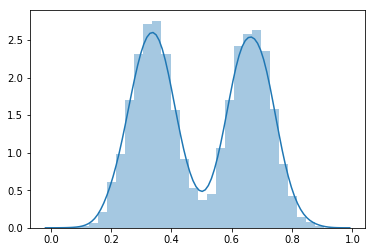

In [21]:
plt.figure()
sns.distplot(importance_df)

In [19]:
hmc = hamiltonian.HamiltonianUpdate(camel, densities.Gaussian(1, .07), 10, .005)
#start = met.sample(5000, np.random.rand(5)).data[-1] # warmup
start = 1/3
hmc_sample = hmc.sample(10000, start)

Event 1	(batch acceptance rate: 1.000000)
Event 2	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 3	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 4	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 5	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 6	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 7	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 8	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 9	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 10	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 20	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 30	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 40	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 50	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 60	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 70	(batch acceptance rate: 1.000000)

In [23]:
hmc_df = pd.DataFrame(hmc_sample.data)

/net/theorie/home/tjansse2/studium/masterarbeit/hep-monte-carlo/hepmc_env/lib64/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


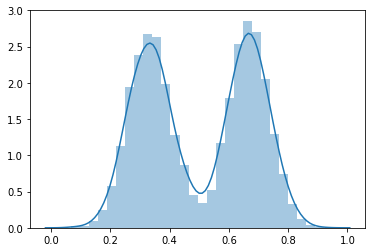

In [24]:
plt.figure()
sns.distplot(hmc_df)

In [25]:
spherical_hmc = hamiltonian.StaticSphericalHMC(camel, .03, .03, 30, 30)
start = 1/3
spherical_hmc_sample = spherical_hmc.sample(10000, start)

Event 1	(batch acceptance rate: 1.000000)
Event 2	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 3	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 4	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 5	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 6	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 7	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 8	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 9	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 10	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 20	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 30	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 40	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 50	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 60	(batch acceptance rate: 1.000000)	max sequence length: 1
Event 70	(batch acceptance rate: 1.000000)

In [26]:
spherical_hmc_df = pd.DataFrame(spherical_hmc_sample.data)

/net/theorie/home/tjansse2/studium/masterarbeit/hep-monte-carlo/hepmc_env/lib64/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


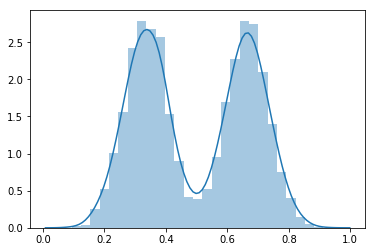

In [27]:
plt.figure()
sns.distplot(spherical_hmc_df)

In [28]:
util.effective_sample_size(spherical_hmc_sample, spherical_hmc_sample.mean, spherical_hmc_sample.variance)

array([10000.])